# Time Series Analysis
### **Author**


Joshua Mull jmull@ucsb.edu
|

Github Link: https://github.com/llumj/Assignment-1-EDS-296

#### Install Packages 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs

Use intake package to open climate model maintained by Amazon Web Services 

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

# Specify search terms to query catalog for CanESM5 data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id = ['CESM2']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = 'r10i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon' 

# variable_id: which climate variable do you want? Here we want surface air temperature
variable_id = 'tas' 

In [3]:
# Open the CMIP6 data catalog, store as a variable
catalog_2 = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

# Specify search terms to query catalog for CanESM5 data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids_2 = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id_2 = ['MIROC6']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids_2 = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id_2 = 'r10i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id_2 = 'Amon' 

# variable_id: which climate variable do you want? Here we want surface air temperature
variable_id_2 = 'tas' 

Search through the catalog for historical and future data in CESM2

In [4]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res.df)

# Read in just the historical data file
hist_data = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})

ssp126_model_data =  xr.open_zarr(res.df['zstore'][2], storage_options={'anon': True})

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190313
1,ScenarioMIP,NCAR,CESM2,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
2,ScenarioMIP,NCAR,CESM2,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
3,ScenarioMIP,NCAR,CESM2,ssp245,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
4,ScenarioMIP,NCAR,CESM2,ssp585,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528


In [5]:
 # Concatenate historical and future projection data
cesm2_concat_data = xr.concat([hist_data, ssp126_model_data], dim="time")

Search through the catalog for historical and future data in MIROC-ES2H

In [6]:
# Search through catalog, store results in "res" variable
res= catalog_2.search(activity_id=activity_ids_2, source_id=source_id_2, experiment_id=experiment_ids_2, 
                     member_id=member_id_2, table_id=table_id_2, variable_id=variable_id_2)

# Display data frame associated with results
display(res.df)

# Read in just the historical data file
hist_data_2 = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})

ssp126_model_data_2 =  xr.open_zarr(res.df['zstore'][3], storage_options={'anon': True})

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,MIROC,MIROC6,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/MIROC/MIROC6/histori...,NaN,20181212
1,ScenarioMIP,MIROC,MIROC6,ssp585,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/MIROC/MIROC6/...,NaN,20200623
2,ScenarioMIP,MIROC,MIROC6,ssp245,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/MIROC/MIROC6/...,NaN,20200623
3,ScenarioMIP,MIROC,MIROC6,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/MIROC/MIROC6/...,NaN,20200817


In [7]:
# Concatenate historical and future projection data
miroc6_model_data = xr.concat([hist_data_2, ssp126_model_data_2], dim="time")

## Location: Columbus, Ohio

This region is a mid-sized urban area with a mix of impervious surfaces and vegetation. While Columbus has more green spaces compared to highly urbanized cities like New York, the presence of impervious surfaces still contributes to increased heat retention and reduced moisture absorption. This urban heat island effect can exacerbate the impacts of rising temperatures, making it challenging to mitigate the effects of climate change. Summers in Columbus are typically warm and humid, and climate models predict significant changes for the region, including increased frequency of extreme heat events and shifts in precipitation patterns. These factors make Columbus an interesting choice for studying climate impacts and adaptation strategies.


## Plot the time series data for Model 1: CESM2

In [8]:
# For historic data
# Define min/max bounds for region of interest (Columbus, Ohio) with 0-360 longitudes
lat_min, lat_max = 39.5, 40.5
lon_min, lon_max = 276.5, 277.5

# Define logical mask: True when lat/lon inside the valid ranges, False else
tas_Columbus_lat = (hist_data.lat >= lat_min) & (hist_data.lat <= lat_max)
tas_Columbus_lon = (hist_data.lon >= lon_min) & (hist_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_Columbus = hist_data.where(tas_Columbus_lat & tas_Columbus_lon, drop=True)

# Average over lat, lon dimensions to get a time series
tas_Columbus = tas_Columbus.mean(dim=["lat", "lon"])

# Convert time to datetime64 format
time = hist_data.time.astype('datetime64[ns]')

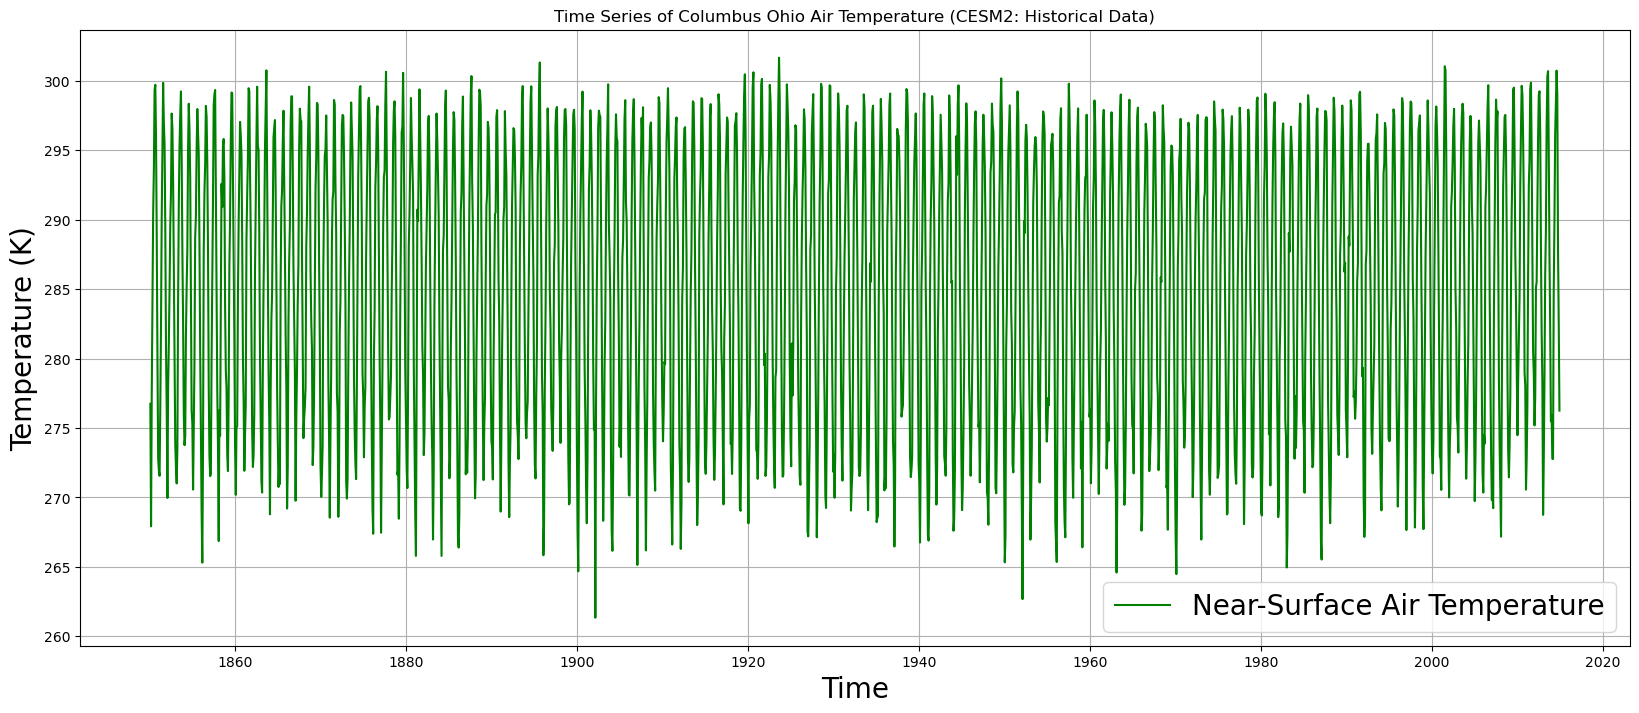

In [9]:
# Generate plot for Historic Data
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_Columbus.tas, label='Near-Surface Air Temperature', color='g')
ax.set_title("Time Series of Columbus Ohio Air Temperature (CESM2: Historical Data)")
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

In [10]:
# For historic data
# Define min/max bounds for region of interest (Columbus, Ohio) with 0-360 longitudes
lat_min, lat_max = 39.5, 40.5
lon_min, lon_max = 276.5, 277.5

# Define logical mask: True when lat/lon inside the valid ranges, False else
tas_Columbus_lat = (cesm2_concat_data.lat >= lat_min) & (cesm2_concat_data.lat <= lat_max)
tas_Columbus_lon = (cesm2_concat_data.lon >= lon_min) & (cesm2_concat_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_Columbus = cesm2_concat_data.where(tas_Columbus_lat & tas_Columbus_lon, drop=True)

# Average over lat, lon dimensions to get a time series
tas_Columbus = tas_Columbus.mean(dim=["lat", "lon"])

# Convert time to datetime64 format
time = cesm2_concat_data.time.astype('datetime64[ns]')

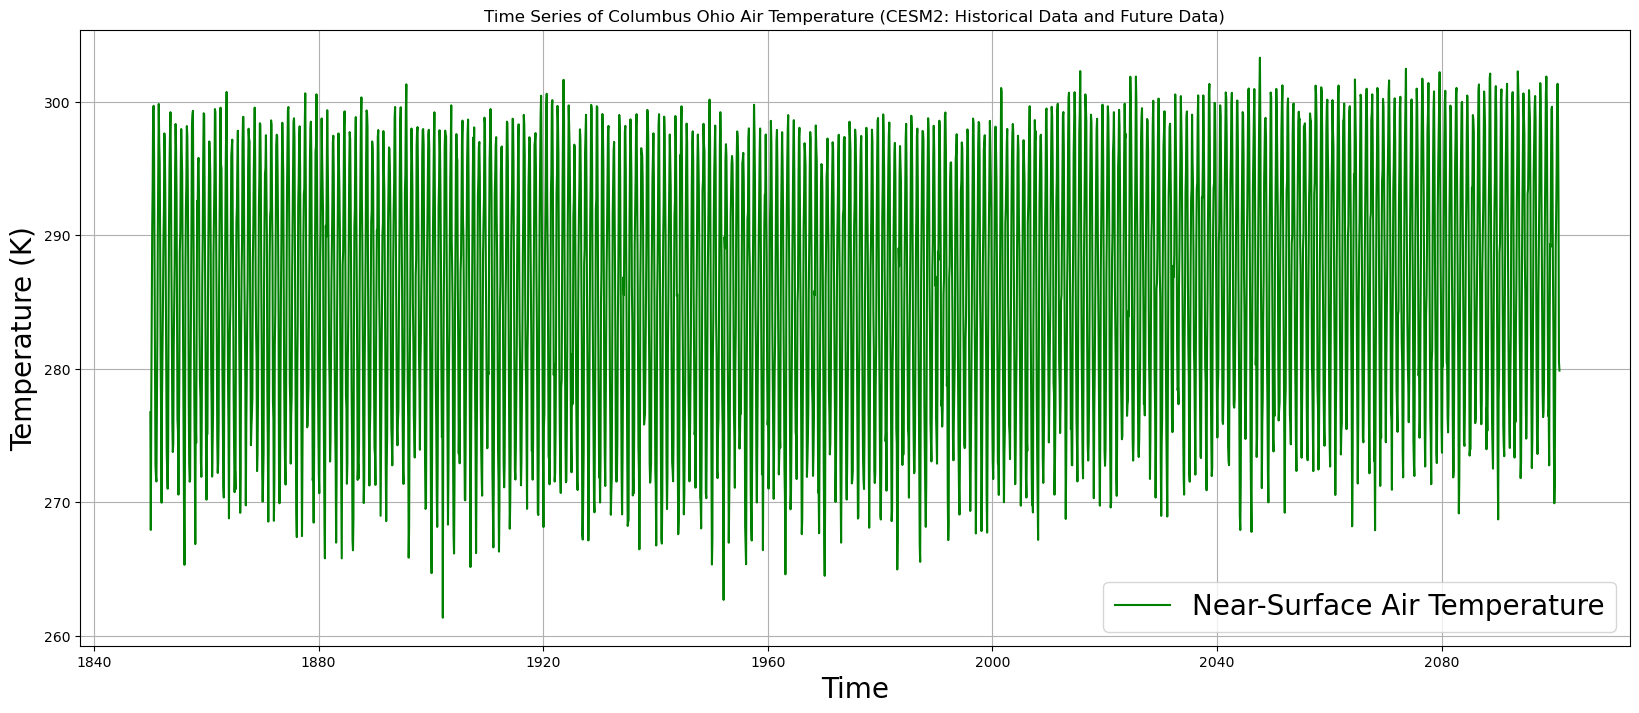

In [11]:
# Generate plot for Historic Data
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_Columbus.tas, label='Near-Surface Air Temperature', color='g')
ax.set_title("Time Series of Columbus Ohio Air Temperature (CESM2: Historical Data and Future Data)")
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

- The historical data shows mild increase in temp for Columbus, whereas the future projection shows a dramatic increase in air surface temperature. 


- Higher temperatures would result in a great many changes to the Columbus, Ohio environment: issues like increased toxic algal blooms in nearby rivers and lakes, including the Scioto River and Hoover Reservoir, increased risk of wildfires, heightened instances of heatstroke and exposure-related illnesses, etc. A change this significant would devastate the local ecosystems Columbus relies on, such as its water bodies and agricultural lands. Without adequate access to such resources, the city’s residents might face higher costs to import necessities from elsewhere (which could lead to significant controversy), or endure widespread suffering

## Plot the time series data for Model 2: MIROC6

In [12]:
# For historic data
# Define min/max bounds for region of interest (Columbus, Ohio) with 0-360 longitudes
lat_min, lat_max = 39.5, 40.5
lon_min, lon_max = 276.5, 277.5

# Define logical mask: True when lat/lon inside the valid ranges, False else
tas_Columbus_lat = (hist_data_2.lat >= lat_min) & (hist_data_2.lat <= lat_max)
tas_Columbus_lon = (hist_data_2.lon >= lon_min) & (hist_data_2.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_Columbus = hist_data_2.where(tas_Columbus_lat & tas_Columbus_lon, drop=True)

# Average over lat, lon dimensions to get a time series
tas_Columbus = tas_Columbus.mean(dim=["lat", "lon"])

# Convert time to datetime64 format
time = hist_data_2.time.astype('datetime64[ns]')

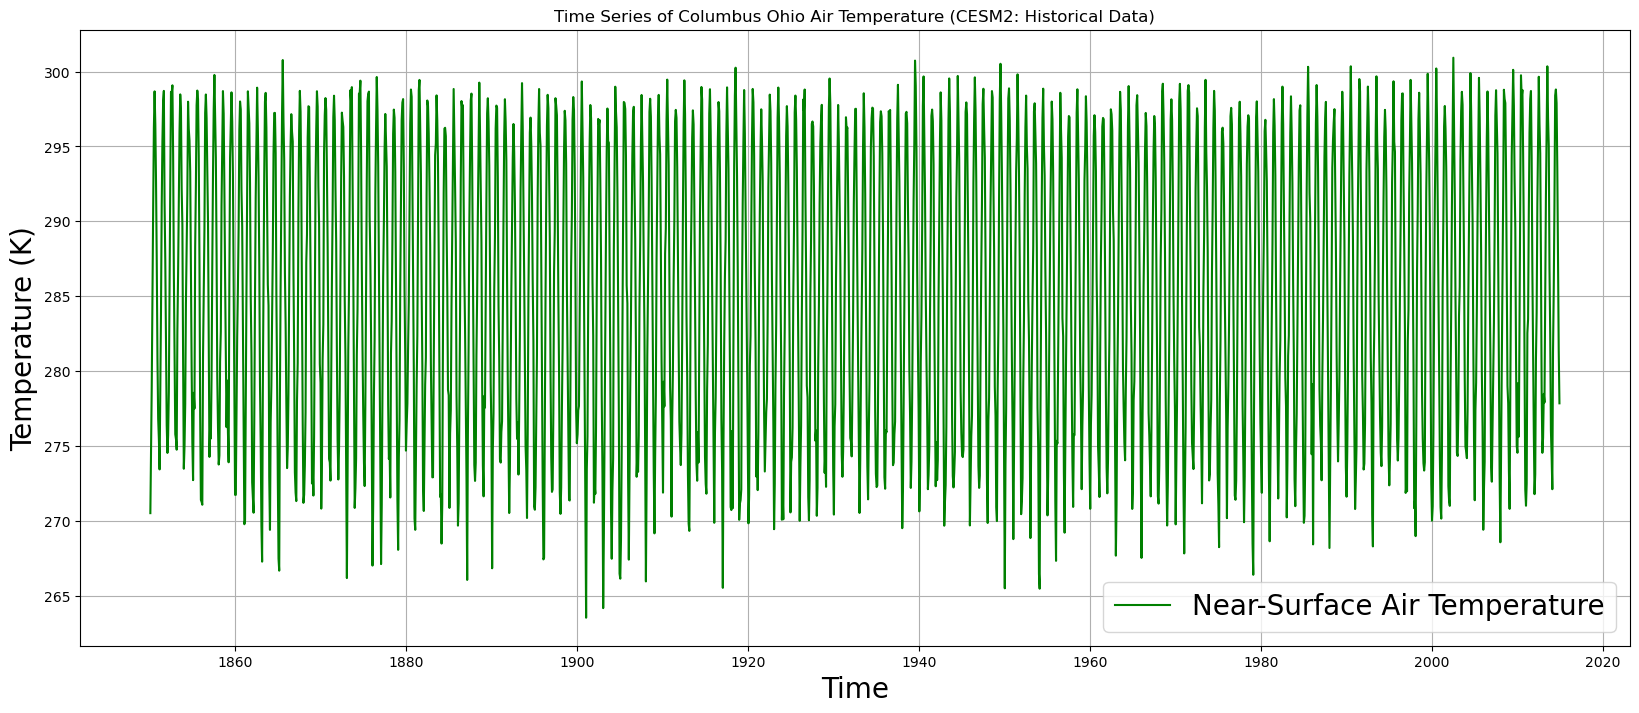

In [13]:
# Generate plot for Historic Data
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_Columbus.tas, label='Near-Surface Air Temperature', color='g')
ax.set_title("Time Series of Columbus Ohio Air Temperature (CESM2: Historical Data)")
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

In [14]:
# For historic data
# Define min/max bounds for region of interest (Columbus, Ohio) with 0-360 longitudes
lat_min, lat_max = 39.5, 40.5
lon_min, lon_max = 276.5, 277.5

# Define logical mask: True when lat/lon inside the valid ranges, False else
tas_Columbus_lat = (miroc6_model_data.lat >= lat_min) & (miroc6_model_data.lat <= lat_max)
tas_Columbus_lon = (miroc6_model_data.lon >= lon_min) & (miroc6_model_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_Columbus = miroc6_model_data.where(tas_Columbus_lat & tas_Columbus_lon, drop=True)

# Average over lat, lon dimensions to get a time series
tas_Columbus = tas_Columbus.mean(dim=["lat", "lon"])

# Convert time to datetime64 format
time = miroc6_model_data.time.astype('datetime64[ns]')

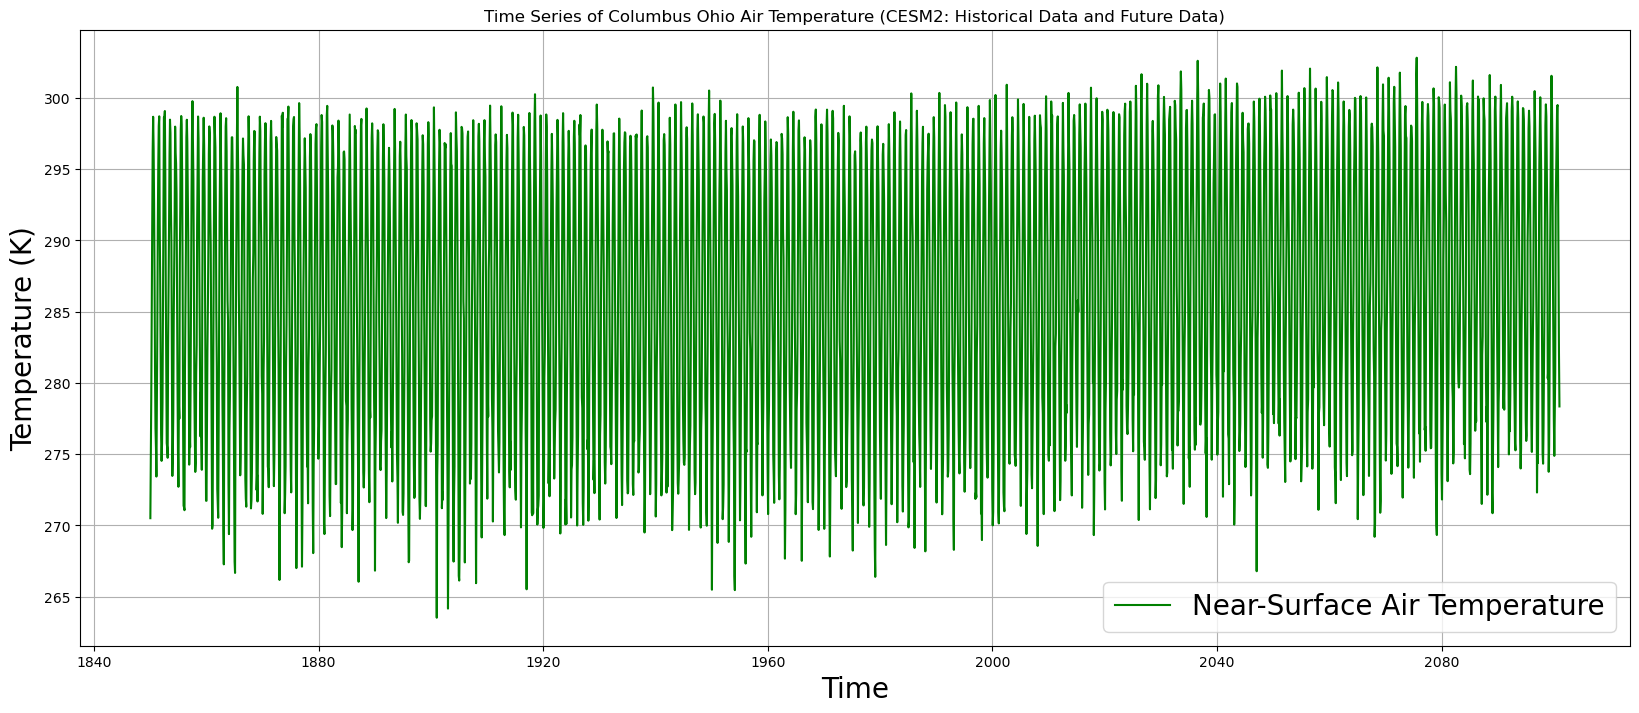

In [15]:
# Generate plot for Historic Data
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_Columbus.tas, label='Near-Surface Air Temperature', color='g')
ax.set_title("Time Series of Columbus Ohio Air Temperature (CESM2: Historical Data and Future Data)")
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

- The historical data shows mild increase in temp for Columbus, whereas the future projection shows a less dramatic increase in air surface temperature than the previous model